 # Gender classification using keras API

In [ ]:
import numpy as np  # Data manipulation
import pandas as pd # Dataframe manipulation 
import matplotlib.pyplot as plt # Plotting the data and the results
import matplotlib.image as mpimg # For displaying imagees
%matplotlib inline
from keras import models
from keras import layers
import keras.preprocessing  as kp
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers

# Exploratory Data Analysis

**Let's first prep the ImageDataGenerator with minor data augmentations to keep the training time optimal.**

In [ ]:
train_datagen = ImageDataGenerator( # Data Augumentation for test data
rescale=1./255,
rotation_range=30,
shear_range=0.3,
zoom_range=0.3
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_gen=train_datagen.flow_from_directory('../input/gender-recognition-200k-images-celeba/Dataset/Train',
                                            target_size=(250,250),
                                            batch_size=48,
                                            class_mode='binary')

160000 images should be enough for the model to pick up the local patterns.

In [ ]:
valid_gen=test_datagen.flow_from_directory('../input/gender-recognition-200k-images-celeba/Dataset/Validation',
                                           target_size=(250,250),
                                           batch_size=48,
                                           class_mode='binary')

In [ ]:
kernel_s=(3,3) # The size of kernel

Let's build the model now.

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,kernel_s,activation='relu',input_shape=(250,250,3),
                        kernel_regularizer=regularizers.l2(0.001),padding="VALID"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

# Model Training

In [ ]:
history=model.fit(train_gen,steps_per_epoch=70,epochs=30,
                  validation_data=valid_gen,validation_steps=50)

Let's plot the training vs validation loss and accuracy graphs.

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

# Model Testing

In [ ]:
test_datagen1 = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen1.flow_from_directory(
'../input/gender-recognition-200k-images-celeba/Dataset/Test',
target_size=(250,250),
batch_size=32,
class_mode='binary')

In [ ]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=32)
print('test acc:', test_acc)
print('test_loss:',test_loss)

A error rate under 0.10 and accuracy of above 90% is reasonably fair for a gender recognition task! (at least for a novice like me :D )

# Model testing on completely new dataset!

In [ ]:
fig,ax=plt.subplots(ncols=2,nrows=4,figsize=(20,20))
img1 = mpimg.imread('../input/gender-recognition-200k-images-celeba/Dataset/Test/Female/160003.jpg')
ax[0][0].imshow(img1)
ax[0][0].set_title("Dataset we trained and tested on.")
img2 = mpimg.imread('../input/gender-classification-dataset/Training/female/131422.jpg.jpg')
ax[0][1].imshow(img2)
ax[0][1].set_title("The completely new dataset.")
img3 =  mpimg.imread('../input/gender-recognition-200k-images-celeba/Dataset/Validation/Female/180019.jpg')
ax[1][0].imshow(img3)
img4= mpimg.imread('../input/gender-classification-dataset/Validation/female/113010.jpg.jpg')
ax[1][1].imshow(img4)
img5 = mpimg.imread('../input/gender-recognition-200k-images-celeba/Dataset/Validation/Male/180028.jpg')
ax[2][0].imshow(img5)
img6 = mpimg.imread('../input/gender-classification-dataset/Validation/male/063517.jpg.jpg')
ax[2][1].imshow(img6)
ax[3][0].imshow(mpimg.imread('../input/gender-recognition-200k-images-celeba/Dataset/Validation/Male/180073.jpg'))
ax[3][1].imshow(mpimg.imread('../input/gender-classification-dataset/Validation/male/063531.jpg.jpg'))
plt.tight_layout()

Observe how different the new dataset is. It is low resoultion, and the images are zoomed in!

In [ ]:
test_datagen2 = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen2.flow_from_directory(
'../input/gender-classification-dataset/Training',
target_size=(250,250),
batch_size=64,
class_mode='binary')

In [ ]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)
print('test_loss:',test_loss)

In [ ]:
test_datagen3 = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen1.flow_from_directory(
'../input/gender-classification-dataset/Validation',
target_size=(250,250),
batch_size=64,
class_mode='binary')

In [ ]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)
print('test_loss:',test_loss)

Uh, the accuracy falls drastically (over 20%) and the error rate (loss) increases by 1100%

This tells us that the model is not yet prepared to deal with any set of male/female classification dataset, but I guess that is what deep learning is about. All models are somewhat specific to the kind of the data they were trained on.


What should be changed to better the generalization of the model?

Should more features be augmented? (Horizontal/Vertical flips, Rotation etc). 

Should I stop trying to fit my model on a totally new dataset? (Is it a waste of time?)

**What do you think?**

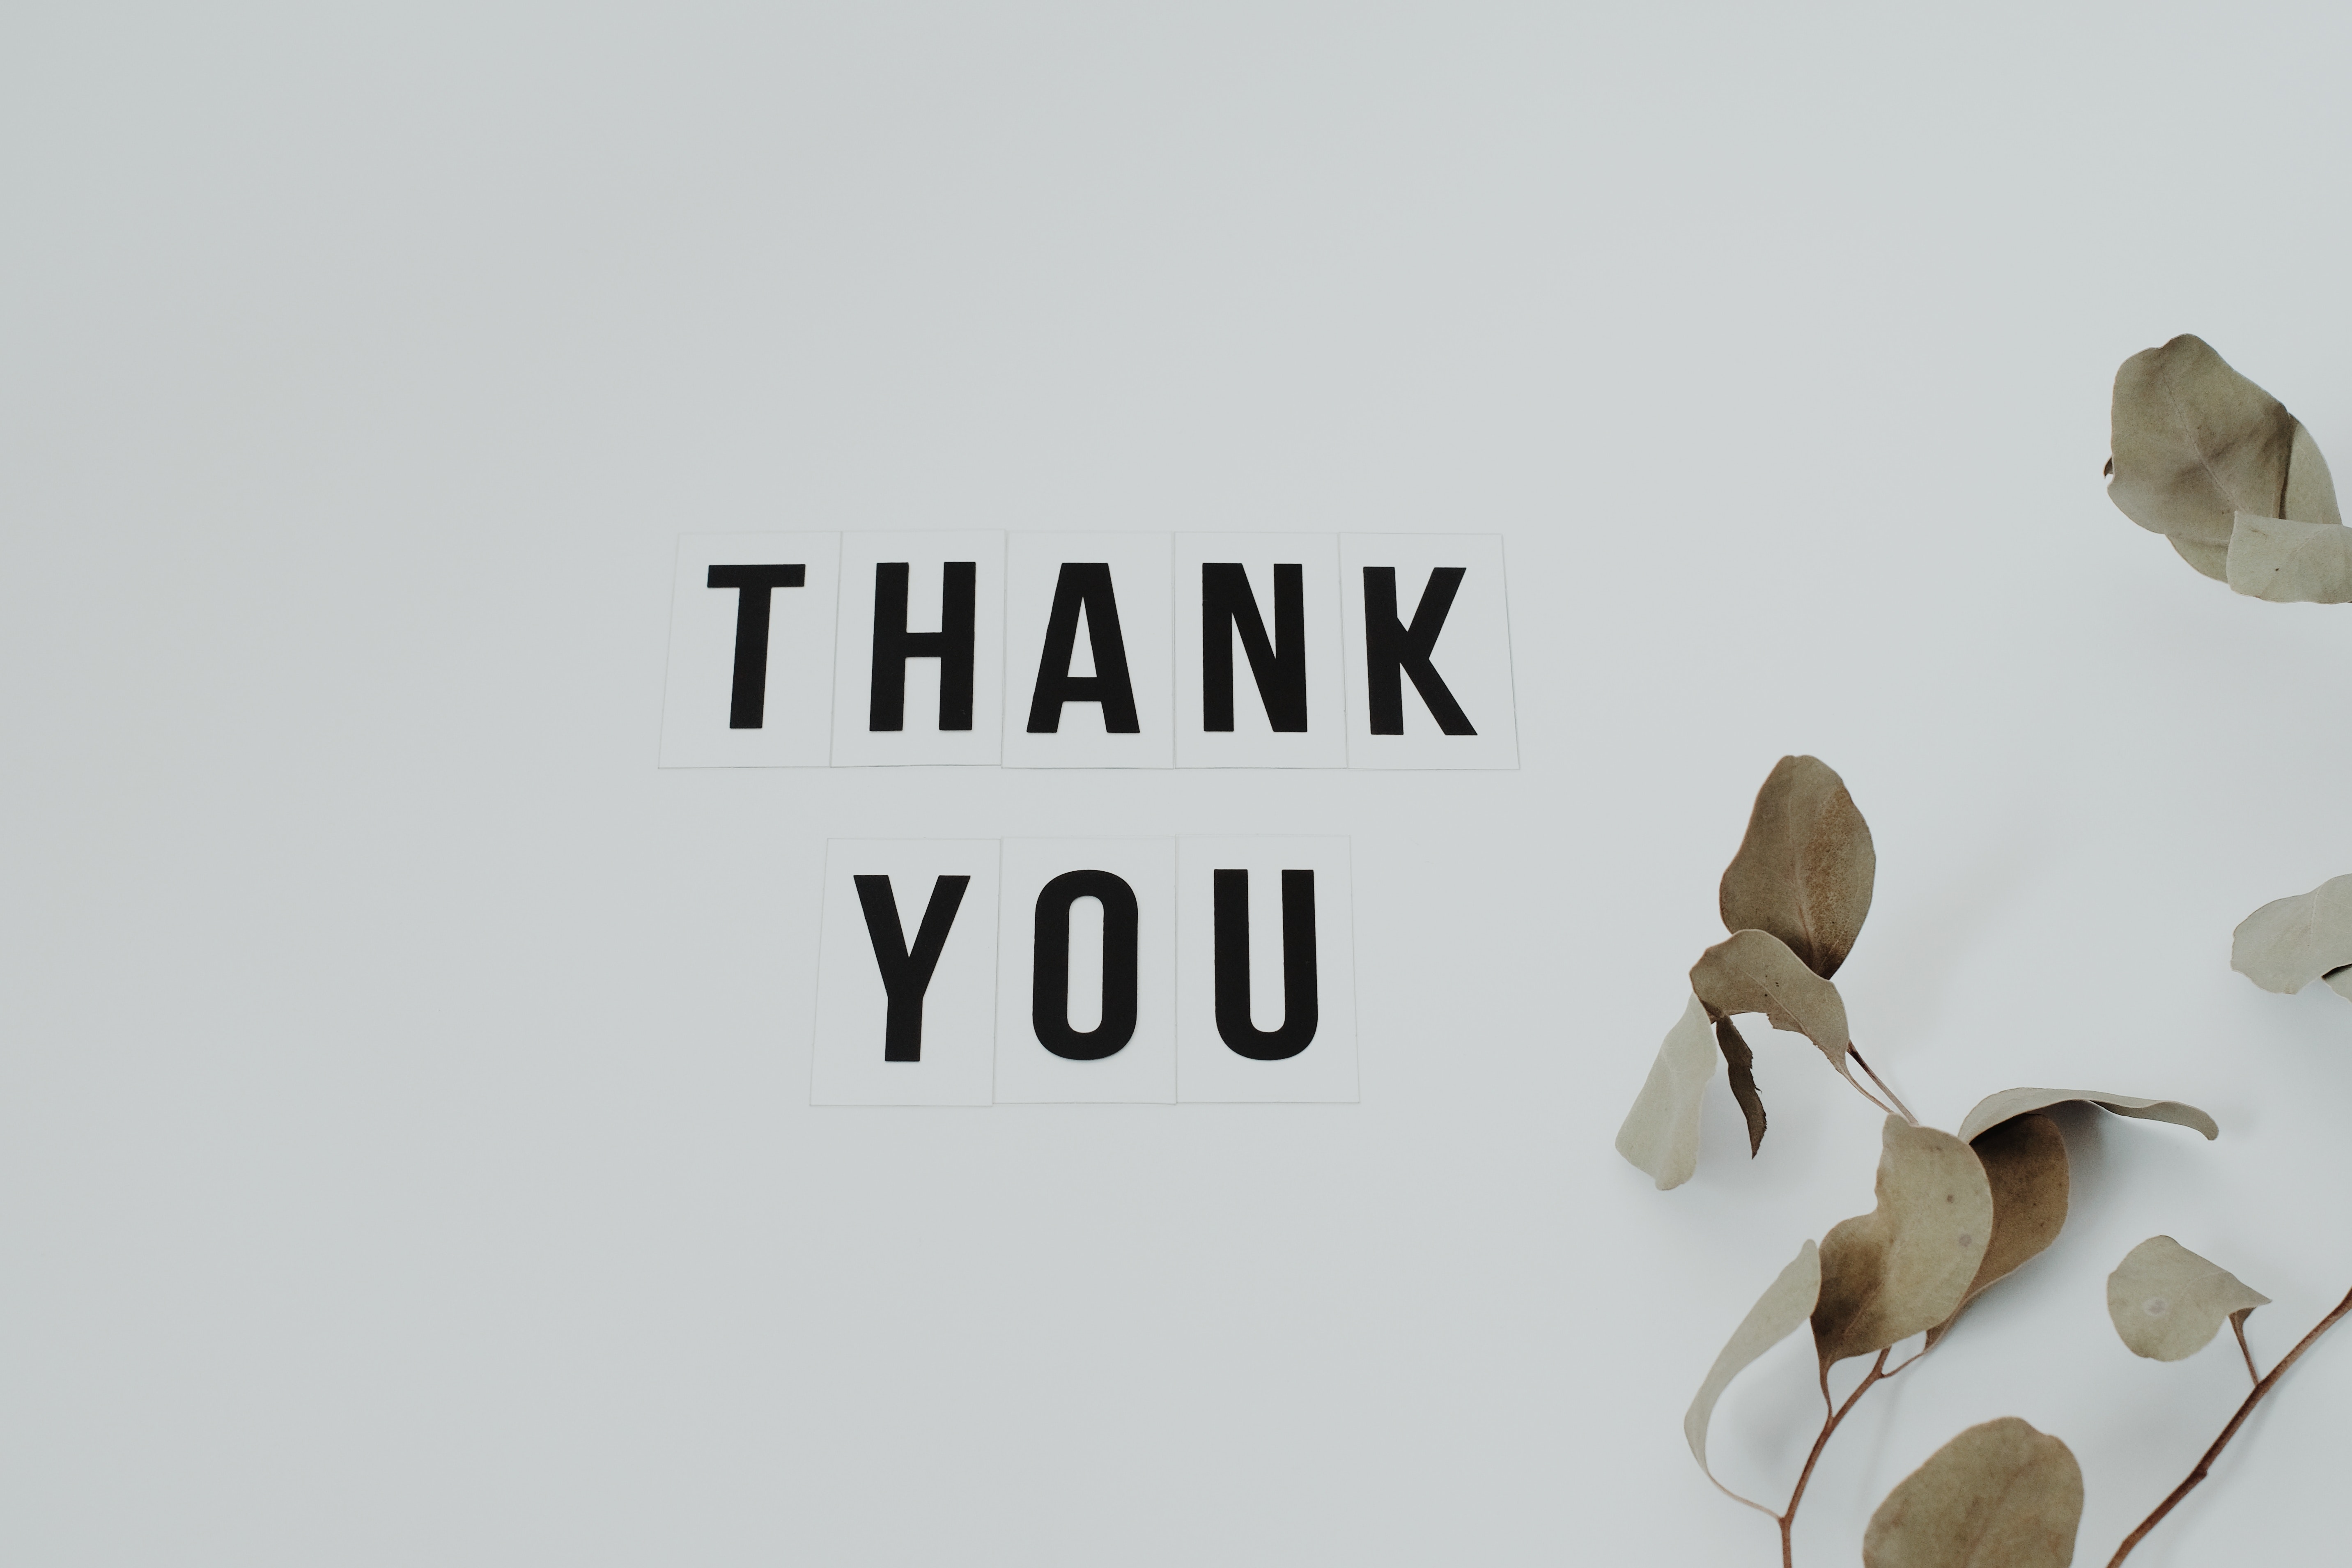

For going through this notebook.

**Also, I am fairly new to data science and machine and I still hope that you found something useful in this notebook.** 